<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-the-data" data-toc-modified-id="Import-libraries-and-load-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries and load the data</a></span></li></ul></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Categorical features</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Modeling" data-toc-modified-id="Linear-Regression-Modeling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Regression Modeling</a></span></li></ul></li></ul></div>

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is analyzing data sets to summarize their main characteristics such as mean, standard deviation, and count, so on, often with visual methods.

It’s often the first step in data analysis, implemented before any formal statistical techniques are applied.

This dataset is from kaggle. The business problem is to analyze customer personalities and expenses.

 ### Import libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

from datetime import datetime, date, timedelta
from library.sb_utils import save_file
%matplotlib inline

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('./Data/01_cleaned_data.csv')

In [3]:
df.head()

,Income,Dt_Customer,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp2,AcceptedCmp6,Edu,Household,Age,Children,Days_Enrolled,Total_Spent,Age_group,Total_AcceptedCmp
0,58138.0,2012-04-09,635,88,546,172,88,88,3,8,...,0,1,Grad,single,65,0,3619,1617,60-70,1
1,46344.0,2014-08-03,11,1,6,2,1,6,2,1,...,0,0,Grad,single,68,2,2773,27,60-70,0
2,71613.0,2013-08-21,426,49,127,111,21,42,1,8,...,0,0,Grad,couple,57,0,3120,776,50-60,0
3,26646.0,2014-10-02,11,4,20,10,3,5,2,2,...,0,0,Grad,couple,38,1,2713,53,30-40,0
4,58293.0,2014-01-19,173,43,118,46,27,15,5,5,...,0,0,Postgrad,couple,41,1,2969,422,40-50,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2078 non-null   float64
 1   Dt_Customer          2078 non-null   object 
 2   Wines                2078 non-null   int64  
 3   Fruits               2078 non-null   int64  
 4   Meat                 2078 non-null   int64  
 5   Fish                 2078 non-null   int64  
 6   Sweets               2078 non-null   int64  
 7   Gold                 2078 non-null   int64  
 8   NumDealsPurchases    2078 non-null   int64  
 9   NumWebPurchases      2078 non-null   int64  
 10  NumCatalogPurchases  2078 non-null   int64  
 11  NumStorePurchases    2078 non-null   int64  
 12  NumWebVisitsMonth    2078 non-null   int64  
 13  AcceptedCmp3         2078 non-null   int64  
 14  AcceptedCmp4         2078 non-null   int64  
 15  AcceptedCmp5         2078 non-null   i

In [5]:
df.columns

Index(['Income', 'Dt_Customer', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp6', 'Edu', 'Household', 'Age', 'Children', 'Days_Enrolled',
       'Total_Spent', 'Age_group', 'Total_AcceptedCmp'],
      dtype='object')

## Categorical features

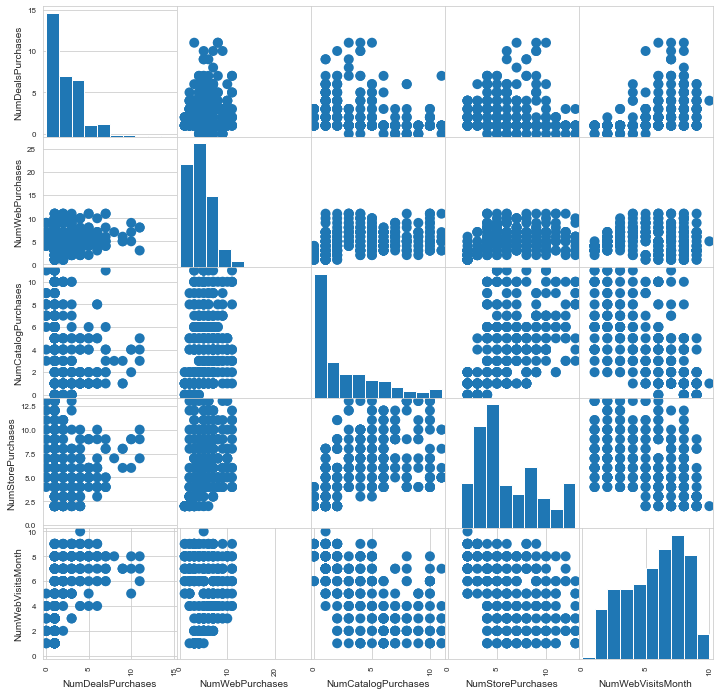

In [6]:
# Visaul EDA
features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']
pd.plotting.scatter_matrix(df[features], df['AcceptedCmp6'], figsize=(12,12), s=100, marker='o');

 - 'Dt_Customer' - Date of customer's enrollment with the company: Get the number of days the customers enrolled as 'Days_Enrolled'

In [7]:
# use pd.to_datetime() to parse the values in the column 'Dt_Customer
df['Dt_Customer']= pd.to_datetime(df.Dt_Customer)

# use datetime.today() to get number of days the customers enrolled 
df['Days_Enrolled'] = datetime.today() - df.Dt_Customer

df['Month'] = df['Dt_Customer'].dt.month
df['Quarter1'] = df['Month'].map(lambda x: x in [1,2,3]).astype('int32')
df['Quarter2'] = df['Month'].map(lambda x: x in [4,5.6]).astype('int32')
df['Quarter3'] = df['Month'].map(lambda x: x in [7,8,9]).astype('int32')
df['Quarter4'] = df['Month'].map(lambda x: x in [10,11,12]).astype('int32')

In [8]:
# customer_df.select_dtypes(include='O')

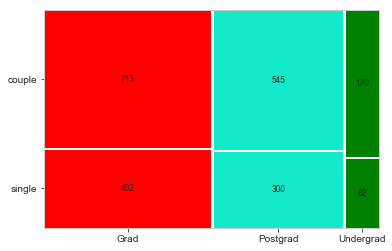

In [9]:
# Mosaic Plot. It contains four parameters (data,featuresToBeCompare,labelizer, properties) 
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

props={}
props[('Grad','couple')]={'facecolor':'red', 'edgecolor':'white'}
props[('Grad','single')]={'facecolor':'red', 'edgecolor':'white'}

props[('Postgrad','couple')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Postgrad','single')]={'facecolor':'xkcd:aqua','edgecolor':'white'}

props[('Undergrad','couple')]={'facecolor':'green','edgecolor':'white'}
props[('Undergrad','single')]={'facecolor':'green','edgecolor':'white'}

labelizer=lambda k:{('Grad','couple'):713,('Grad','single'):402,('Postgrad','couple'):545,('Postgrad','single'):300, ('Undergrad','couple'):170, ('Undergrad','single'):82 }[k]
_= mosaic(df,['Edu','Household'],labelizer=labelizer,properties=props)

In [10]:
crosstable=pd.crosstab(df['Age_group'], df['AcceptedCmp6'])
crosstable

AcceptedCmp6,0,1
Age_group,,
20-30,17,5
30-40,212,61
40-50,523,78
50-60,478,80
60-70,385,67
70-80,141,29


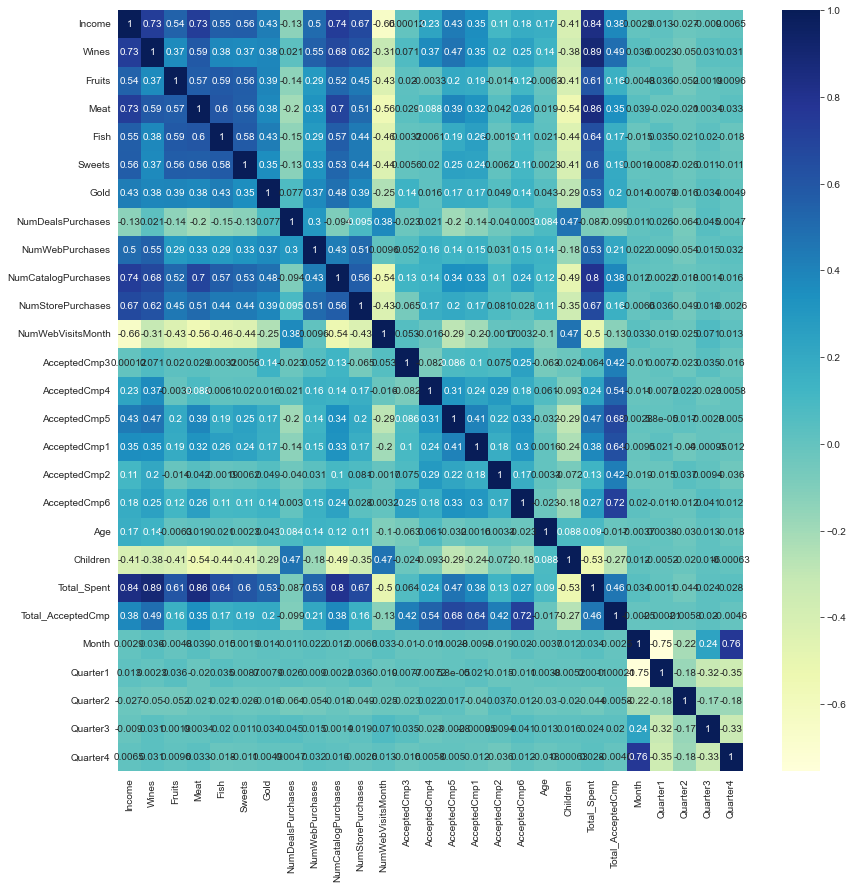

In [11]:
# Call the .corr() method on the customer dataset 
corr = df.corr()
# Make a heatmap of the data 
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True,cmap="YlGnBu");  # corr.style.background_gradient(cmap='viridis')

In [12]:
c = corr.abs().unstack().drop_duplicates().reset_index()
c = c.rename(columns={'level_0': 'feature 1', 'level_1': 'feature 2', 0: 'Correlation'})
c = c.query('.5 <= Correlation < 1').sort_values(by = 'Correlation', ascending = False).reset_index(drop=True)
c.style.background_gradient(cmap='Set1_r')

,feature 1,feature 2,Correlation
0,Wines,Total_Spent,0.893926
1,Meat,Total_Spent,0.857131
2,Income,Total_Spent,0.835550
3,NumCatalogPurchases,Total_Spent,0.798162
4,Month,Quarter4,0.764631
5,Month,Quarter1,0.754893
6,Income,NumCatalogPurchases,0.738068
7,Income,Meat,0.728483
8,Income,Wines,0.726575
9,AcceptedCmp6,Total_AcceptedCmp,0.724898


<font color='teal'> A couple of things:</font>
 - Pair_plotting the variables with themselves would be pointless, so the pairplot() method makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.
 - The plot for the 'AcceptedCmp6' variable forms horizontal bands, due to the fact that it's a discrete variable. I will be pursuing a logistic regression analysis of this variable.

In [13]:
print(df.shape)

(2078, 32)


In [14]:
# save the data to a new csv file
datapath = './Data'
save_file(df, '02_EDA.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./Data\02_EDA.csv"
